In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("PySpark") \
    .config("spark.executor.memory", "4g") \
    .config("spark.executor.cores", "4") \
    .getOrCreate()

24/06/24 21:32:07 WARN Utils: Your hostname, nobara-ll5 resolves to a loopback address: 127.0.1.1; using 192.168.1.22 instead (on interface eno1)
24/06/24 21:32:07 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/24 21:32:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 38310)
Traceback (most recent call last):
  File "/usr/lib64/python3.12/socketserver.py", line 318, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib64/python3.12/socketserver.py", line 349, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib64/python3.12/socketserver.py", line 362, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib64/python3.12/socketserver.py", line 761, in __init__
    self.handle()
  File "/home/mikolaj/.local/lib/python3.12/site-packages/pyspark/accumulators.py", line 295, in handle
    poll(accum_updates)
  File "/home/mikolaj/.local/lib/python3.12/site-packages/pyspark/accumulators.py", line 267, in poll
    if self.rfile in r and func():
                           ^^^^^^
  File "/home/mikolaj/.local/lib/python3.12/site-packages/pyspark/

In [2]:
print(spark)

In [7]:
import cv2
import numpy as np
import os
import sys
from pyspark.sql.functions import udf
from pyspark.sql.types import BinaryType
from pyspark.sql import Row

def read_image(name):
    image = cv2.imread(name)
    _, buffer = cv2.imencode('.jpg', image)
    return buffer.tobytes()

read_image_udf = udf(lambda z: read_image(z), BinaryType())




In [11]:
image_paths = []

for data in os.listdir('data'):
    image_paths.append('data/' + data)

print(image_paths)

['data/LC08_L1TP_230062_20190830_20200826_02_T1.jpg', 'data/LC08_L1TP_230062_20231028_20231101_02_T1.jpg', 'data/LC08_L1TP_160043_20130413_20200913_02_T1.jpg', 'data/LC09_L1TP_160043_20240622_20240622_02_T1.jpg', 'data/LC08_L1TP_038032_20130609_20200913_02_T1.jpg', 'data/LC08_L1TP_038032_20230925_20231002_02_T1.jpg', 'data/LC08_L1TP_163042_20130327_20200912_02_T1.jpg', 'data/LC08_L1TP_163042_20240619_20240620_02_RT.jpg', 'data/LC08_L1TP_232067_20130827_20200912_02_T1.jpg', 'data/LC08_L1TP_232067_20240622_20240622_02_RT.jpg']


In [12]:
image_df = spark.createDataFrame([Row(path=path) for path in image_paths])
image_df = image_df.withColumn("image", read_image_udf(image_df['path']))

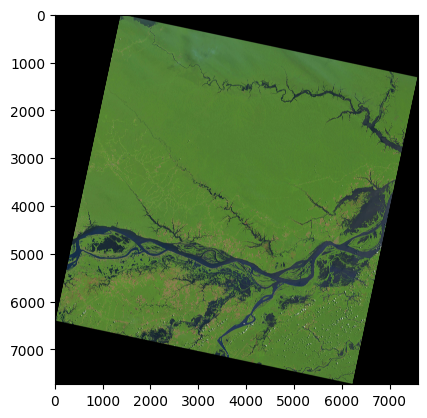

In [16]:
#show imge in the dataframe with plt

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image):
    plt.imshow(mpimg.imread(image))
    plt.show()

show_image(image_paths[0])



